<a href="https://colab.research.google.com/github/dyhwang7/CS4650/blob/main/project4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install --upgrade pandas


     |████████████████████████████████| 11.3 MB 7.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [42]:
pip install --upgrade pandas-datareader

In [41]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 9.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
%matplotlib inline

In [35]:
tickers = ['AAPL', 'FB', 'MSFT','V', 'DIS', 'NVDA']

# 'NVDA', 'MSFT', 'FB', 'RBLX', 'LCID', 'BABA', 'GOOGL', 'PYPL', 'V', 'DIS'
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 11, 30)
data = []

for t in tickers:
  data.append(web.DataReader(t, 'yahoo', start, end))

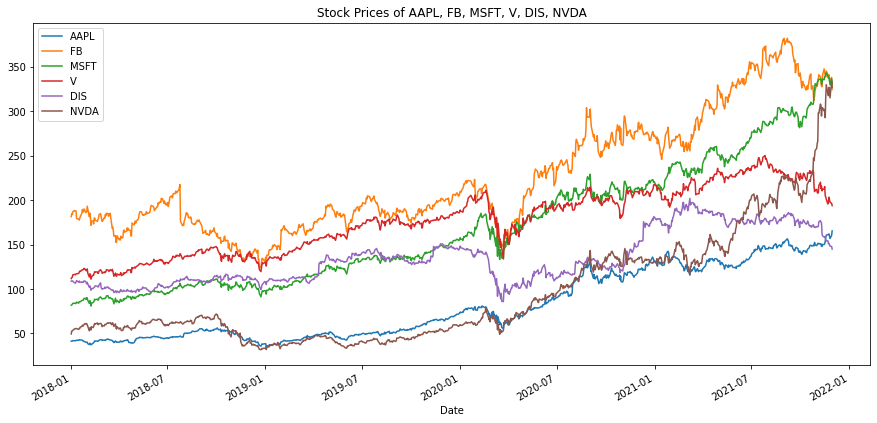

In [36]:
for index, val in enumerate(data):
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
plt.title('Stock Prices of ' + ', '.join(tickers))
plt.legend()


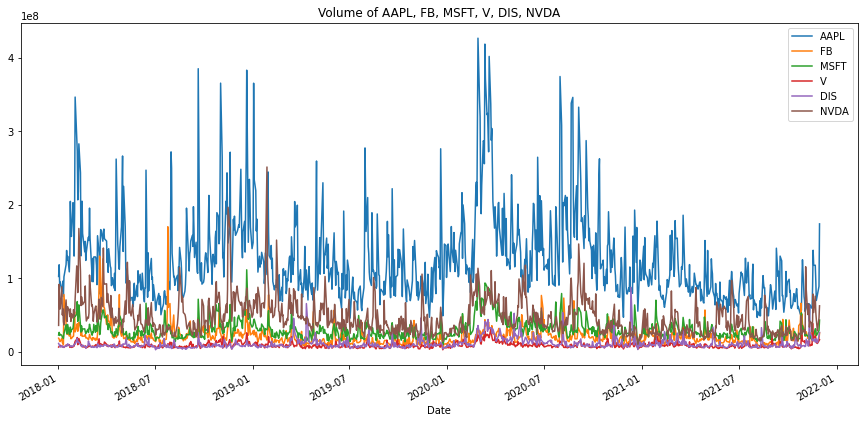

In [37]:
for index, val in enumerate(data):
  val['Volume'].plot(label=tickers[index], figsize=(15,7))
plt.title('Volume of ' + ', '.join(tickers))
plt.legend()

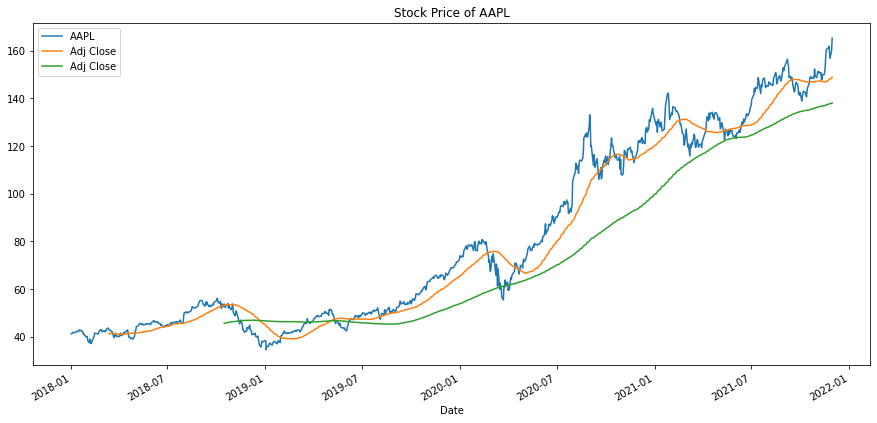

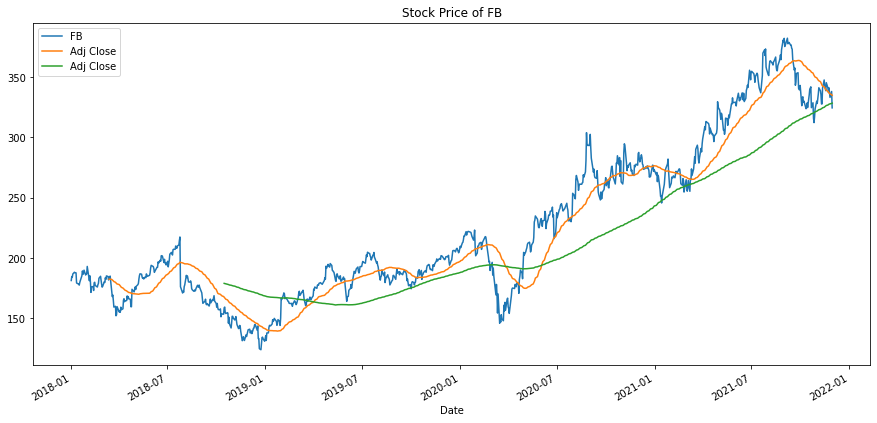

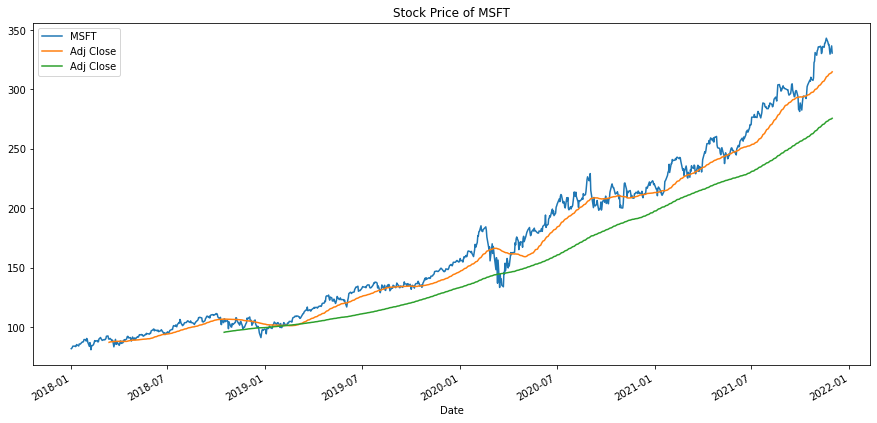

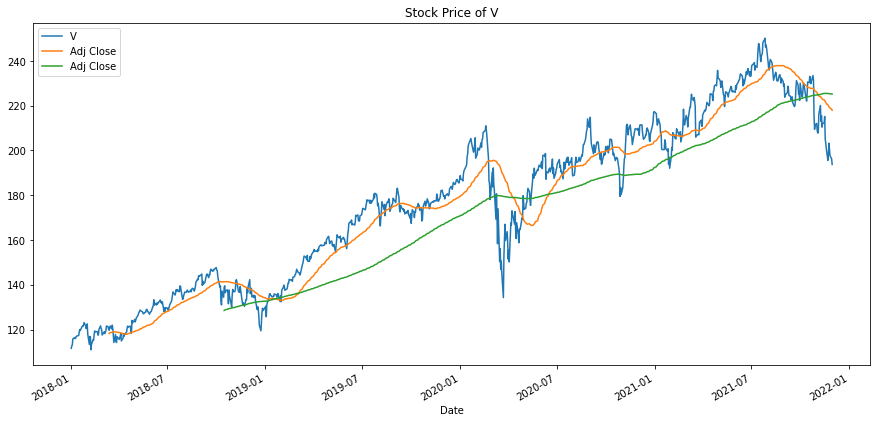

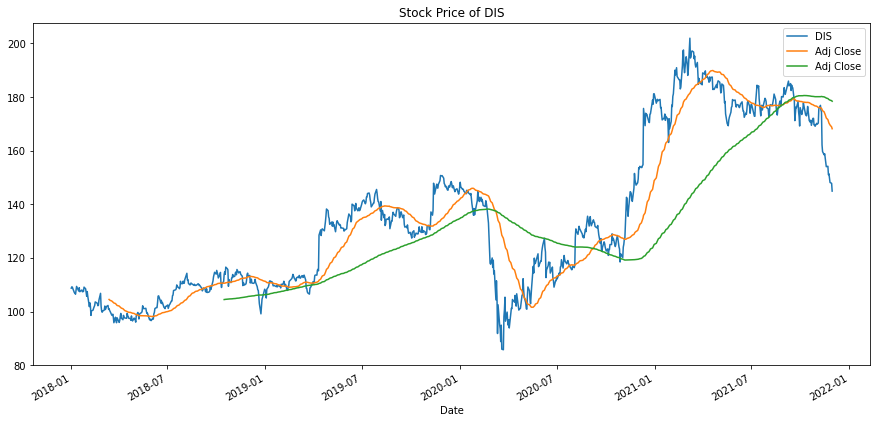

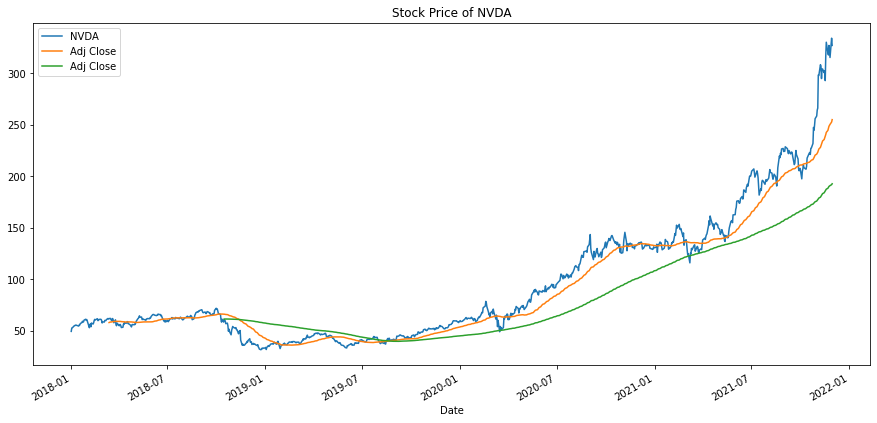

In [38]:
for index, val in enumerate(data):
  rolling_50 = val['Adj Close'].rolling(50).mean()
  rolling_200 = val['Adj Close'].rolling(200).mean()
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
  rolling_50.plot()
  rolling_200.plot()
  plt.title('Stock Price of ' + tickers[index])
  plt.legend()
  plt.show()

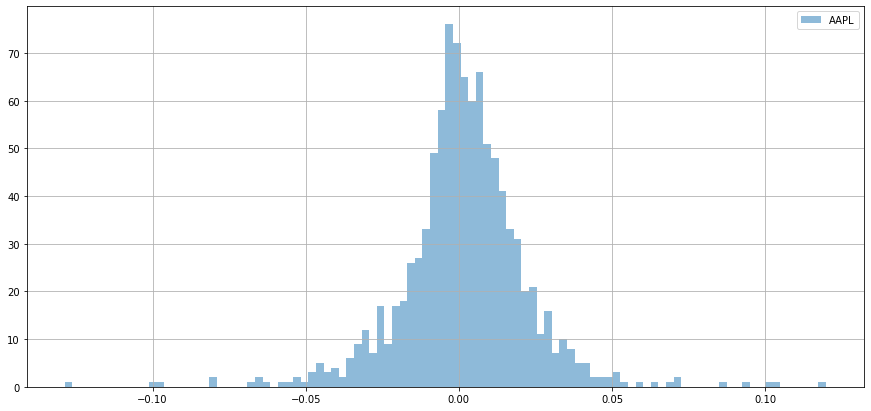

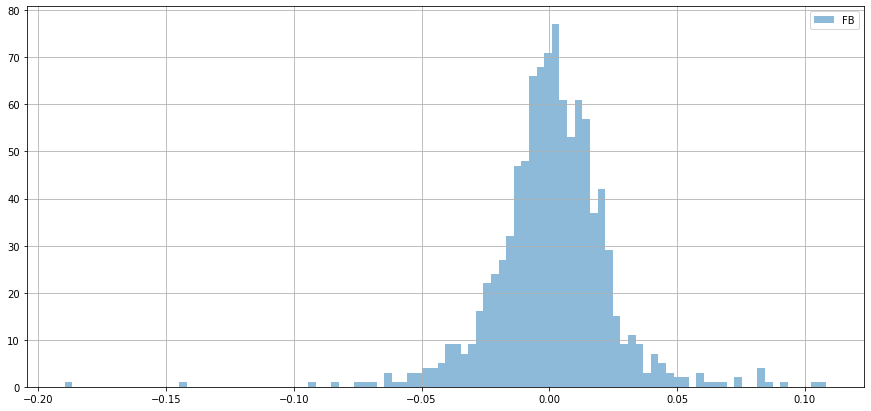

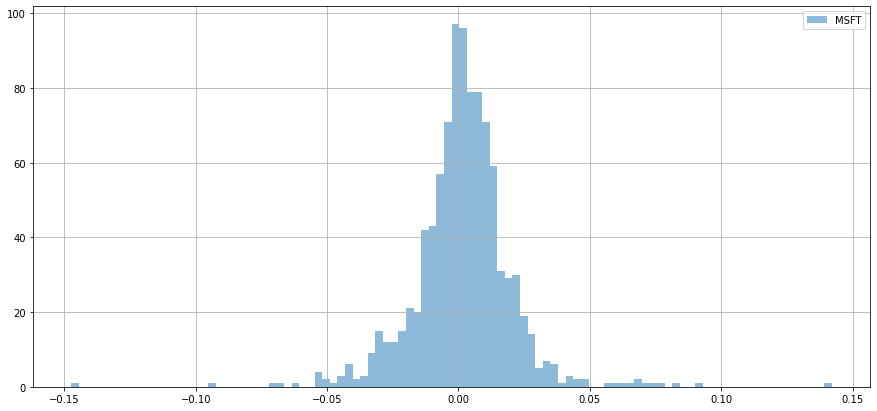

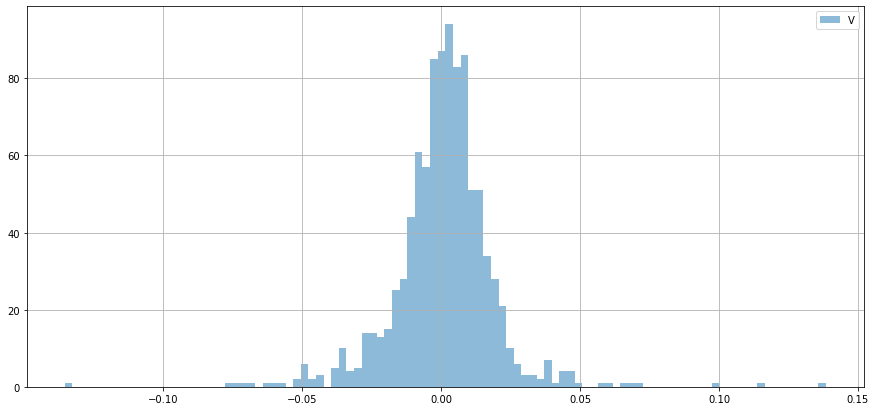

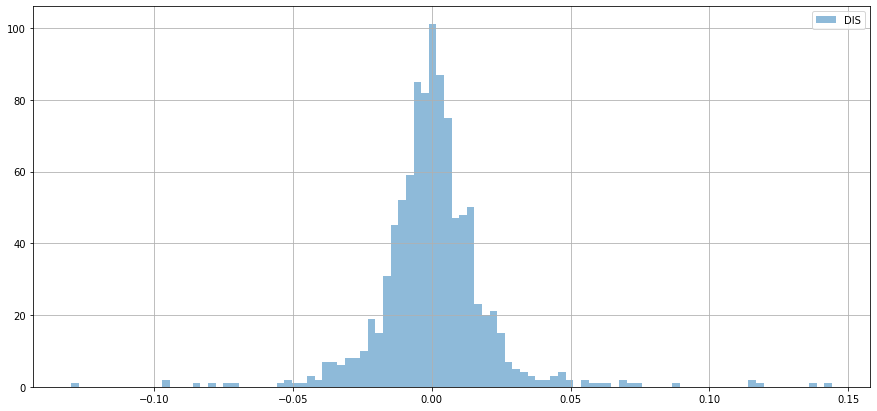

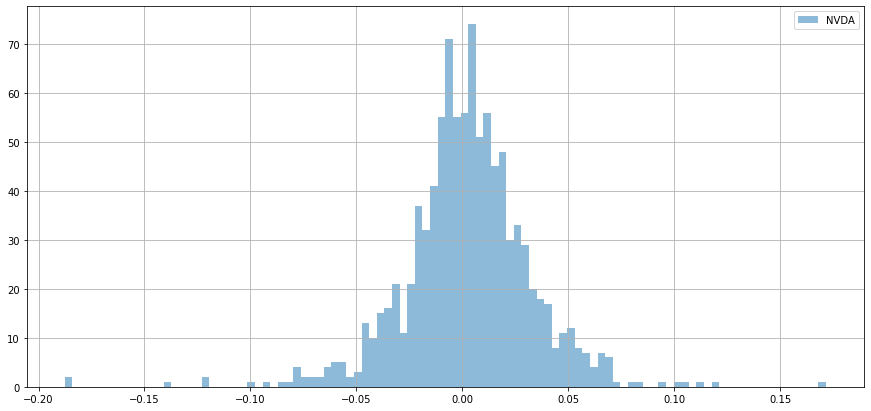

In [39]:

for index, val in enumerate(data):
  returns = (val['Adj Close']/val['Adj Close'].shift(1))-1
  returns.hist(bins = 100, label = tickers[index], alpha = 0.5, figsize = (15,7))
  plt.legend()
  plt.show()


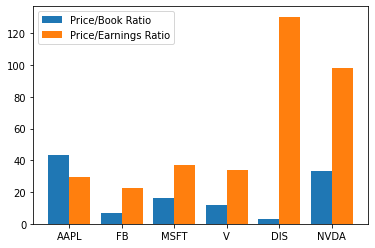

In [66]:
metric_data = []
for t in tickers:
  metric_data.append(yf.Ticker(t))

PB = []
PE = []


for i in metric_data:
  PB.append(i.info['priceToBook'])
  PE.append(i.info['regularMarketPrice']/i.info['trailingEps'])

X_axis = np.arange(len(tickers))

plt.bar(X_axis - 0.2, PB, 0.4, label = 'Price/Book Ratio')
plt.bar(X_axis + 0.2, PE, 0.4, label = 'Price/Earnings Ratio')
plt.xticks(X_axis, tickers)

plt.legend()
plt.show()
